In [24]:
import requests
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
from scipy.cluster.vq import whiten, kmeans2

In [26]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': '2502c6aa7eb148a989cfe4b3b98ca5ae' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [45]:
teams = call_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')

In [28]:
for team in teams:
    market_value = team['squadMarketValue']
    fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
    losses = 0
    for f in fixtures:
        if f['result'] is None or f['result']['goalsHomeTeam'] is None or f['result']['goalsAwayTeam'] is None:
            continue
        if team['name'] == f['homeTeamName']:
            losses += 1 if f['result']['goalsHomeTeam'] < f['result']['goalsAwayTeam'] else 0
        else:
            losses += 1 if f['result']['goalsAwayTeam'] < f['result']['goalsHomeTeam'] else 0
    print('Team "{}", market value is {}, {} losses'.format(team['name'], market_value, losses))
    team['losses'] = losses

Team "FC Rio Ave", market value is 21,125,000 €, 8 losses
Team "FC Porto", market value is 204,900,000 €, 2 losses
Team "Moreirense FC", market value is 9,950,000 €, 11 losses
Team "FC Paços de Ferreira", market value is 17,725,000 €, 9 losses
Team "Sporting CP", market value is 220,250,000 €, 8 losses
Team "Maritimo Funchal", market value is 18,275,000 €, 7 losses
Team "CD Tondela", market value is 11,575,000 €, 12 losses
Team "SL Benfica", market value is 180,150,000 €, 3 losses
Team "Boavista Porto FC", market value is 14,025,000 €, 6 losses
Team "FC Arouca", market value is 18,025,000 €, 9 losses
Team "Vitoria Setubal", market value is 21,200,000 €, 7 losses
Team "C.F. Os Belenenses", market value is 23,650,000 €, 8 losses
Team "Vitoria Guimaraes", market value is 32,850,000 €, 4 losses
Team "Sporting Braga", market value is 63,800,000 €, 4 losses
Team "GD Estoril Praia", market value is 12,950,000 €, 11 losses
Team "Feirense", market value is None, 10 losses
Team "Nacional Funchal

In [29]:
team_for_pd = []
for team in teams:
    if team['squadMarketValue']:
        team_for_pd.append({'name': team['name'], 'market_value': int(re.sub('\D', '', team['squadMarketValue'])), 'losses': team['losses']})

In [35]:
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,losses,market_value,name
0,8,21125000,FC Rio Ave
1,2,204900000,FC Porto
2,11,9950000,Moreirense FC
3,9,17725000,FC Paços de Ferreira
4,8,220250000,Sporting CP
5,7,18275000,Maritimo Funchal
6,12,11575000,CD Tondela
7,3,180150000,SL Benfica
8,6,14025000,Boavista Porto FC
9,9,18025000,FC Arouca


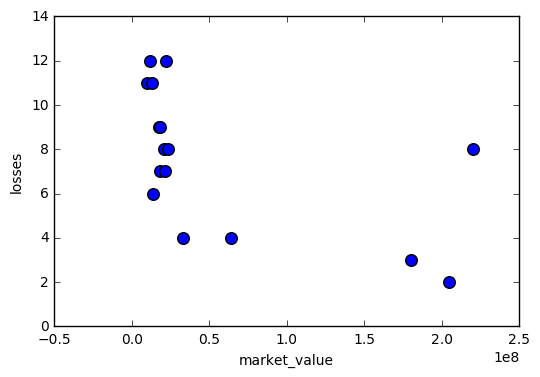

In [36]:
teams_pd.plot.scatter(x='market_value', y='losses', s=70)

In [37]:
del teams_pd['name']
teams_pd

,losses,market_value
0,8,21125000
1,2,204900000
2,11,9950000
3,9,17725000
4,8,220250000
5,7,18275000
6,12,11575000
7,3,180150000
8,6,14025000
9,9,18025000


In [38]:
whitened = whiten(teams_pd.as_matrix())

In [39]:
centroids, cluster_map = kmeans2(whitened, 3)

In [40]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

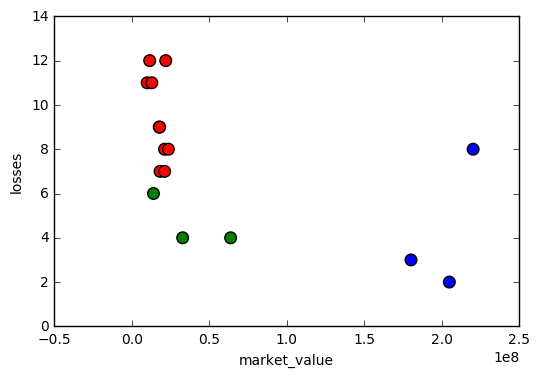

In [41]:
teams_pd.plot.scatter(x='market_value', y='losses', c=colors, s=70)

In [42]:
centroids, cluster_map = kmeans2(whitened, 5)

In [43]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

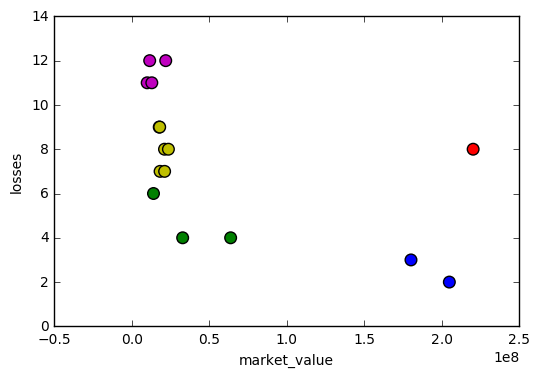

In [44]:
teams_pd.plot.scatter(x='market_value', y='losses', c=colors, s=70)